In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#망델브로집합 p.72
Y,X=np.mgrid[-1.3:1.3:0.005,-2:1:0.005]

Z=X+1j*Y
c=tf.constant(Z.astype(np.complex64))
zs=tf.Variable(c)
ns=tf.Variable(tf.zeros_like(c,tf.float32))

sess=tf.InteractiveSession()
tf.global_variables_initializer().run()

zs_=zs*zs+c
not_diverged=tf.abs(zs_) < 4
step=tf.group(zs.assign(zs_),ns.assign_add(tf.cast(not_diverged,tf.float32)))
for i in range(200): step.run()

plt.imshow(ns.eval())
plt.show()

In [ ]:
#균일분포 p.77
#tf.random_uniform(shape, minval, maxval, dtype, seed, name)
uniform=tf.random_uniform([100],0,1,tf.float32)
sess=tf.Session()
plt.hist(uniform.eval())
plt.show()

In [ ]:
#정규분포 p.79
#tf.random_normal(shape,mean(평균),stddev(표준편차))
norm=tf.random_normal([100],mean=0,stddev=2)
sess=tf.Session()
plt.hist(norm.eval(),normed=True)
plt.show()

In [ ]:
#몬테카를로기법(확률기반난수생성) p.81
#원안에 있는 점의 개수를 세서 원주율 구하기
trials=100
hits=0
x=tf.random_uniform([1],minval=-1,maxval=1,dtype=tf.float32)
y=tf.random_uniform([1],minval=-1,maxval=1,dtype=tf.float32)
pi=[]
sess=tf.Session()
for i in range(1,trials):
    for j in range(1,trials):
        if x.eval()**2+y.eval()**2 < 1:
            #x^2+y^2 사용
            hits+=1
            pi.append((4*float(hits)/i)/trials)
plt.plot(pi)
plt.show()

In [ ]:
#연못에 물 떨어뜨리기p.84
#파동형성 함수

def make_kernel(a):
    a=np.asarray(a)
    a=a.reshape(list(a.shape)+[1,1])
    return tf.constant(a,dtype=1)
def simple_conv(x,k):
    x=tf.expand_dims(tf.expand_dims(x,0),-1)
    y=tf.nn.depthwise_conv2d(x,k,[1,1,1,1],padding='SAME')
    return y[0,:,:,0]
def laplace(x):
    laplace_k=make_kernel([[0.5,1.0,0.5],
                         [1.0,-6.,1.0],
                         [0.5,1.0,0.5]])
    return simple_conv(x,laplace_k)

N=500

#연못생성
u_init=np.zeros([N,N],dtype=np.float32)
for n in range(40):
    a,b=np.random.randint(0,N,2)
    u_init[a,b]=np.random.uniform()
plt.imshow(u_init)
plt.show()

#시간에 따라 변하는 연못
ut_init=np.zeros([N,N],dtype=np.float32)

#변수, 모델 정의
eps=tf.placeholder(tf.float32,shape=())
damping=tf.placeholder(tf.float32,shape=())
U=tf.Variable(u_init)
Ut=tf.Variable(ut_init)

#편미분 함수정의
U_=U+eps*Ut
Ut_=Ut+eps*(laplace(U)-damping*Ut)

step=tf.group(U.assign(U_),Ut.assign(Ut_))
tf.global_variables_initializer().run()
for i in range(1000):
    step.run({eps:0.03,damping:0.04})
    if i%333==0:
        plt.imshow(U.eval())
        plt.show()

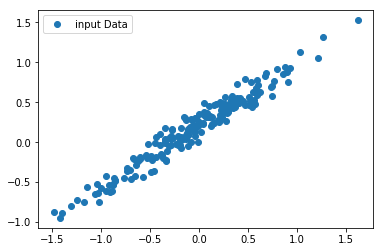

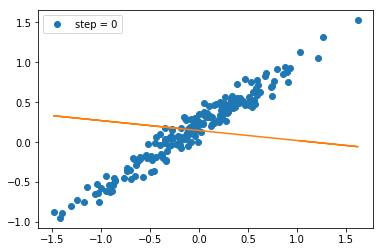

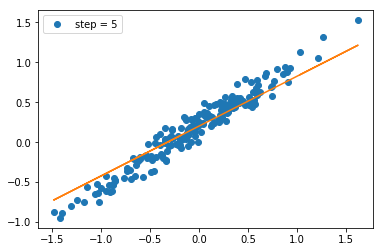

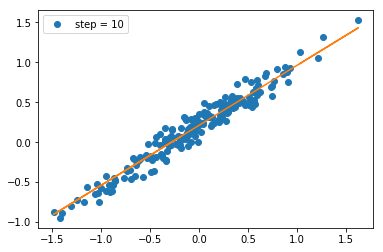

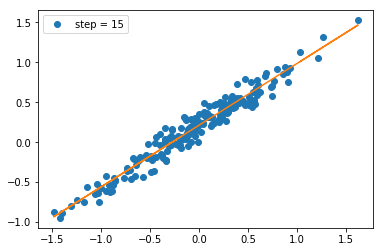

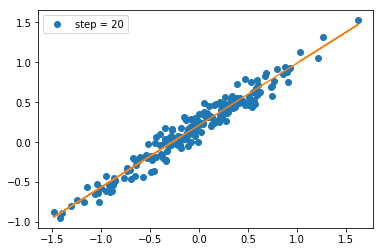

In [2]:
#경사하강 난수실습 p.100
number_of_points=200
x_point=[]
y_point=[]
a=0.78
b=0.22
for i in range(number_of_points):
    x=np.random.normal(0.0,0.5)
    y=a*x+b+np.random.normal(0.0,0.1)
    x_point.append([x])
    y_point.append([y])
plt.plot(x_point,y_point,'o',label='input Data')
plt.legend()
plt.show()

W=tf.Variable(tf.random_uniform([1],-1.0,1.0))
B=tf.Variable(tf.zeros([1]))
hypothesis=W*x_point+B
cost=tf.reduce_mean(tf.square(hypothesis-y_point))
optimizer=tf.train.GradientDescentOptimizer(0.5)
train=optimizer.minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(21):
        sess.run(train)
        if step%5==0:
            plt.plot(x_point,y_point,'o',label='step = {}'.format(step))
            plt.plot(x_point,sess.run(W)*x_point+sess.run(B))
            plt.legend()
            plt.show()

In [ ]:
import input_data
mnist_images=input_data.read_data_sets("mnist_data",one_hot=False)
pixels,real_values=mnist_images.train.next_batch(10)

image=pixels[5,:]
image=np.reshape(image,[28,28])
plt.imshow(image)
plt.show()